# Lab 4

In [ ]:
FIRST_NAME = "Leng"
LAST_NAME = "Her"
STUDENT_ID = "5445877"

## Introduction

This lab is all about reading and writing files from AWS S3. We will build on top of the models and functions that were created in Labs 2 and 3. The machine learning part is already completed below. Each question will contribute 1 part to a system that can help track machine learning models and predictions with S3.

## The Data Set

**Data Description**

This is a simulated data set of students performance in the INET 4062 class. _None of these are actual students._

**Data Dictionary**

| Column Name | Type | Description |
| :----------- | :-- | :----------- |
| studentId | `int` | Unique Id of student |
| gpa | `float` | Current cumulative GPA |
| labHours | `float` | Number of hours spent per week on labs |
| studyHours | `float` | Number of hours spent studying for each exam |
| took4061 | `int` | Binary if student took INET 4061 (0=No, 1=Yes) |
| pythonExp | `int` | A High, Medium, or Low rating from student on previous python experience (0=Low, 1=Medium, 2=High) |
| statsRating | `int` | A 0-5 rating of ability on statistics |
| height | `float` | Height of student in inches |
| eyeColor | `str` | Eye color of student |
| followers | `int` | Number of followers on all social media accounts |
| grade | `float` | Percentage grade in INET 4062 out of 100 |
| letterGrade | `str` | Letter grade derived from the percentage |


**Data Sample**

|   studentId |     gpa |   labHours |   studyHours |   took4061 |   pythonExp |   statsRating |   height | eyeColor   |   followers |   grade | letterGrade   |
|------------:|--------:|-----------:|-------------:|-----------:|------------:|--------------:|---------:|:-----------|------------:|--------:|:--------------|
|           0 | 3.62061 |   3.0089   |     4.36066  |          1 |           2 |             3 |  69.4933 | brown      |         632 |   92.31 | A-            |
|           1 | 3.19391 |   2.524    |     4.88687  |          0 |           2 |             2 |  67.3275 | blue       |          44 |   85.59 | B             |
|           2 | 3.19453 |   0.903686 |     2.0478   |          1 |           1 |             5 |  69.3401 | green      |         181 |   88.39 | B+            |
|           3 | 3.27793 |   4.88015  |     0.822806 |          1 |           2 |             4 |  67.8951 | blue       |         347 |   90.91 | A-            |
|           4 | 2.5     |   1.47281  |     7.51036  |          0 |           2 |             4 |  67.708  | brown      |        1070 |   84.14 | B             |
|           5 | 2.56162 |   4.53166  |     5.50934  |          0 |           1 |             5 |  69.6897 | hazel      |          18 |   84.37 | B             |
|           6 | 3.15581 |   2.60646  |     1.56167  |          0 |           1 |             5 |  69.045  | hazel      |        7007 |   84.2  | B             |
|           7 | 3.73405 |   2.41052  |     2.99812  |          1 |           2 |             5 |  66.5794 | brown      |        5599 |   93.6  | A             |
|           8 | 2.98454 |   2.68131  |     1.73898  |          1 |           2 |             4 |  69.1432 | hazel      |        1206 |   88.73 | B+            |
|           9 | 3.84509 |   5.43147  |     4.9316   |          1 |           1 |             1 |  68.034  | blue       |       40097 |   92.12 | A-            |

#### Simulate Data

In [ ]:
import numpy as np
import pandas as pd

n = 10000 # number of records to simulate
np.random.seed(40) # set the seed of the random number generator

# Current GPA
gpa = 0.4 * np.random.randn(n) + 3.25
gpa = np.clip(gpa, 2.5, 4.0)

# Average hours per week on Labs
labHours = 5.5/np.exp(2*np.random.rand(n))

# Number of hours studying for exam
studyHours = np.power(2*np.random.rand(n) + 0.75, 2)

# Junior or Senior
isSenior = np.random.binomial(size=n, n=1, p=0.67)

# Took 4061
took4061 = np.random.binomial(size=n, n=1, p=0.75)

# Previous Python Experience
pythonExp = np.random.binomial(size=n, n=2, p=0.70)

# Ability in statistics
statsRating = np.random.binomial(size=n, n=5, p=0.75)

# Height
height = 4 * np.random.rand(n) + 66.5

# Eye Color
eyeColor = np.random.choice(["blue", "green", "brown", "hazel"], n)

# Social media followers
followers = (10 ** (1+5*np.random.beta(3, 7, size=n))).round()

# simulate grades
grade = 72 + (((gpa**2)/3 + np.sqrt(statsRating+1)) * 
              np.sqrt(labHours/3 + studyHours/6 + pythonExp + 3*took4061)) + \
              (1+3*np.random.rand())

# Compile columns into a DataFrame
students_df = pd.DataFrame({
    'gpa' : gpa,
    'labHours' : labHours,
    'studyHours' : studyHours,
    'took4061' : took4061,
    'pythonExp' : pythonExp,
    'statsRating' : statsRating,
    'height' : height,
    'eyeColor' : eyeColor,
    'followers' : followers,
    'grade' : grade.round(2)
})

# Define a function to calculate the letter grade based
# on the percentage in the class
def getLetterGrade(x):
  if x < 76.67:
    return("C")
  elif x < 80:
    return("C+")
  elif x < 83.33:
    return("B-")
  elif x < 86.67:
    return("B")
  elif x < 90:
    return("B+")
  elif x < 93.33:
    return("A-")
  else:
    return("A")

# Add the letter grade column to the DataFrame
students_df['letterGrade'] = students_df['grade'].apply(lambda row: getLetterGrade(row))

# Rename the index of the DataFrame to be `studentId`
# because that index uniquely identifies 1 student
students_df.index.rename("studentId", inplace=True)
students_df.reset_index(drop=False, inplace=True)

/tmp/ipykernel_8297/3537645836.py:12: RuntimeWarning: divide by zero encountered in true_divide
  labHours = 5.5/np.exp(2*np.random.rand(n))


In [ ]:
students_df

,studentId,gpa,labHours,studyHours,took4061,pythonExp,statsRating,height,eyeColor,followers,grade,letterGrade
0,0,3.006981,4.312076,6.154981,1,1,4,68.968833,hazel,150.0,88.10,B+
1,1,3.199545,4.468924,6.607994,1,1,3,68.210087,hazel,499.0,88.65,B+
2,2,2.976157,2.074952,1.599081,1,2,5,69.524292,green,117.0,87.94,B+
3,3,3.621486,0.994602,7.210698,1,2,5,70.242933,brown,1049.0,92.19,A-
4,4,2.512240,0.819105,2.258261,1,1,1,66.546452,brown,72.0,82.34,B-
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,3.265625,0.915808,7.422218,1,2,5,68.925192,hazel,149.0,90.12,A-
9996,9996,3.197060,2.061146,4.550661,1,2,4,67.969562,green,863.0,89.08,B+
9997,9997,2.513514,2.893784,3.403938,1,2,4,67.587846,green,334.0,85.85,B
9998,9998,3.115089,3.472824,6.973135,1,2,3,67.842580,green,266.0,88.92,B+


## Machine Learning

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Define feature variables
numeric_columns = ["gpa", "labHours", "studyHours"]
categorical_columns = ["took4061", "pythonExp", "statsRating"]

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', MinMaxScaler(), numeric_columns),
        ('categorical', OneHotEncoder(), categorical_columns)
    ]
)

In [ ]:
# K Nearest Neighbor Pipeline
knn_pipeline_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("knn", KNeighborsRegressor(n_neighbors=10, weights='uniform'))
    ]
)

# Random Forest Pipeline
rf_pipeline_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("random_forest", RandomForestRegressor(n_estimators=100, max_depth=10))
    ]
)

In [ ]:
# Split features and label variable
X = students_df[numeric_columns+categorical_columns]
y = students_df["grade"]

# Train models
knn_pipeline_model = knn_pipeline_model.fit(X, y)
rf_pipeline_model = rf_pipeline_model.fit(X, y)

## Question 1 

* First create an [S3 Service Resource](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#service-resource) object using the `boto3.resource()` function. Name the variable `s3`.
* Then use the `.create_bucket()` method of the S3 Service Resource to create a new S3 bucket.
    * Save the output of this function into a variable named `bucket`. This is a Python representation of the [Bucket](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#S3.Bucket).
    * The bucket name should be globally unique within the AWS Region.

In [ ]:
import boto3

In [ ]:
s3 = boto3.resource('s3')
bucket_name = 'lab-4-leng'
bucket = s3.create_bucket(Bucket=bucket_name)

### Q1 Test

The following code should print out the name of the S3 bucket. You can also view the S3 buckets in the [S3 Management Console](https://s3.console.aws.amazon.com/s3/buckets).

In [ ]:
# Print out the name of all the S3 buckets
print([bucket.name for bucket in s3.buckets.all()])

['lab-4-leng']


## Question 2

The above code under the heading "Machine Learning" trains two ML pipelines with different algorithms named `knn_model_pipeline` and `rf_model_pipeline`.

Save these 2 Scikit-Learn objects to pickle files in the S3 bucket created in Question 1 with the keys `"models/v1/model.pkl"` and `"models/v2/model.pkl"` respectively.

In [ ]:
import pickle
import pandas as pd

In [ ]:
# names for the pickled models
knn_model_file = 'models/v1/model.pkl'
rf_model_file = 'models/v2/model.pkl'

# Save KNN pipeline model
knn_model_bytes = pickle.dumps(knn_pipeline_model)
s3.Object(bucket_name, knn_model_file).put(Body=knn_model_bytes)

# Save Random Forest pipeline model
rf_model_bytes = pickle.dumps(rf_pipeline_model)
s3.Object(bucket_name, rf_model_file).put(Body=rf_model_bytes)

{'ResponseMetadata': {'RequestId': 'H3XS367ZQ2RSG5XK',
  'HostId': 'fSm2eHeoher/TJ0n8s1rC1QANzdxI1eEMB0BUy/ZmN5hg5NZYlOVXBUZCC2D3CzBIjQAoAwjb+s=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'fSm2eHeoher/TJ0n8s1rC1QANzdxI1eEMB0BUy/ZmN5hg5NZYlOVXBUZCC2D3CzBIjQAoAwjb+s=',
   'x-amz-request-id': 'H3XS367ZQ2RSG5XK',
   'date': 'Tue, 21 Feb 2023 23:07:17 GMT',
   'etag': '"c43394d3fc875a25d55e0673a3c6968d"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"c43394d3fc875a25d55e0673a3c6968d"'}

### Q2 Test

The following code should print out `['models/v1/model.pkl', 'models/v2/model.pkl']`.

You should also be able to view the objects in the S3 Management Console.

In [ ]:
print([obj.key for obj in bucket.objects.all()])

['models/v1/model.pkl', 'models/v2/model.pkl']


## Question 3

The function below is an answer to Question 8 of Lab 2 that reads in a saved machine learning model from a pickle file to make predictions on new data. 

Modify this question to do the following:
* Read in both machine learning pickle files from S3
* Get predictions from _both_ models. Save both predictions in the same dictionary to return at the end of the function (example below).
* Create a unique identifier for this set of predictions with the [UUID](https://docs.python.org/3/library/uuid.html#) package. Use the `uuid.uuid4().hex` function.
* Save both the input data and the model predictions to S3 objects with the following keys:
    * `new_students` : _"invocations/{uuid}/features.json"_
    * `predictions` : _"invocations/{uuid}/predictions.json"_

---
**Function example from Lab 2 Q8**
```
def predict(new_students: dict) -> dict:

    # Read in the ML model object
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Convert the new data into a dataframe
    new_students_df = pd.DataFrame(new_students)

    # Get predictions
    new_predictions = model.predict(new_students_df).tolist()

    # Convert into a dictionary
    predictions = {'predictions' : new_predictions}
    return(predictions)
```

**Example output dictionary**    
_Note: the predicted values do not need to match_
```
{'model1': [87.324], 'model2': [87.02621619272111]}
```

In [ ]:
import json
import uuid

In [ ]:
new_students = [{
    'took4061' : 1,
    'pythonExp' : 1,
    'statsRating' : 3,
    'gpa' : 3.1,
    'labHours' : 2.2,
    'studyHours' : 4.7
}]

In [ ]:
def predict(new_students: dict) -> dict:

    # Read in the ML model objects
    bucket_name = 'lab-4-leng'
    model1 = pickle.loads(s3.Bucket(bucket_name).Object('models/v1/model.pkl').get()['Body'].read())
    model2 = pickle.loads(s3.Bucket(bucket_name).Object('models/v2/model.pkl').get()['Body'].read())

    # Convert the new data into a dataframe
    new_students_df = pd.DataFrame(new_students)

    # Get predictions
    new_predictions1 = model1.predict(new_students_df).tolist()
    new_predictions2 = model2.predict(new_students_df).tolist()

    # Convert into a dictionary
    uuid_val = uuid.uuid4().hex
    predictions = {'model1': new_predictions1, 'model2': new_predictions2}

    # Savedata and model predictions
    s3.Bucket(bucket_name).Object(f'invocations/{uuid_val}/features.json').put(Body=json.dumps(new_students).encode())
    s3.Bucket(bucket_name).Object(f'invocations/{uuid_val}/predictions.json').put(Body=json.dumps(predictions).encode())

    return(predictions)

### Q3 test

The following block of code should create three separate invocations saved in S3 and print out the results of the function. The 3 invocations should be visible in the S3 Management Console.

In [ ]:
predict(new_students)
predict(new_students)
predict(new_students)

{'model1': [87.32400000000001], 'model2': [87.02621619272111]}

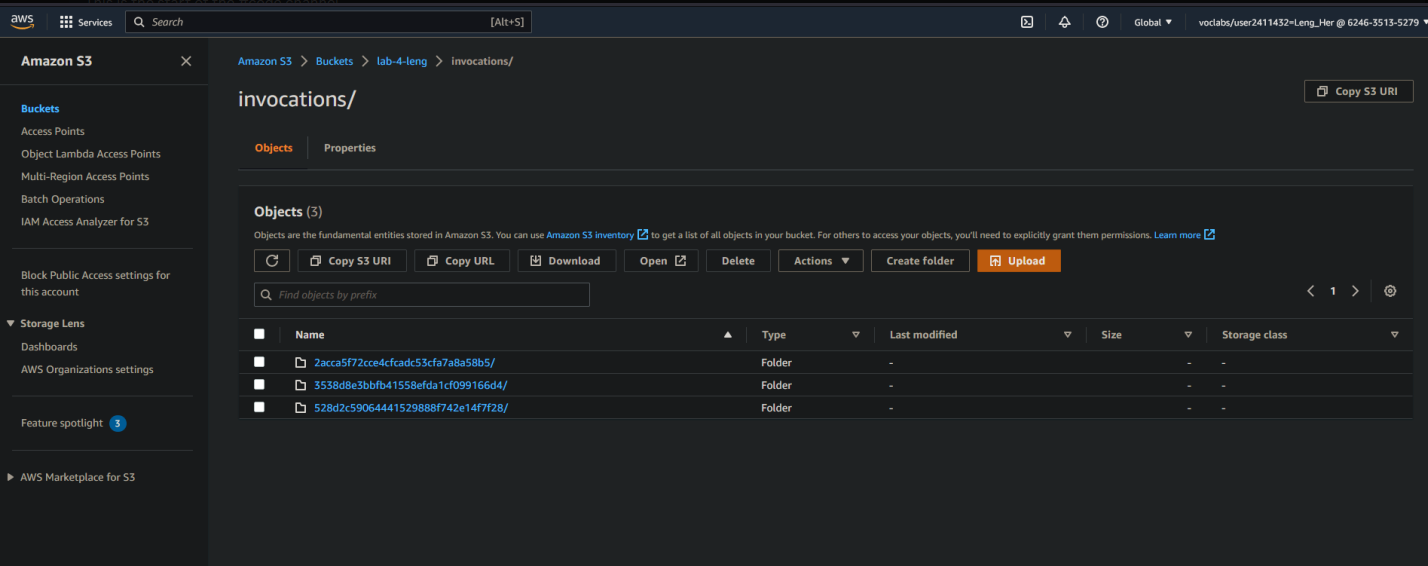

## Question 4

Define a function named `list_invocations()` that returns a list of _distinct_ (no duplicates) unique invocation ids (the UUIDs created by the previous step) that are in the S3 bucket.

In [ ]:

def list_invocations():
    s3 = boto3.client('s3')
    invocations = set()
    prefix = 'invocations/'
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)
    while True:
        if 'Contents' not in response:
            break
        for obj in response['Contents']:
            key = obj['Key']
            uuid = key.split('/')[-2]
            invocations.add(uuid)
        if not response['IsTruncated']:
            break
        response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix, ContinuationToken=response['NextContinuationToken'])
    return list(invocations)


### Q4 Test

The following code should print out a list of 3 UUID's.

In [ ]:
invocations = list_invocations()
invocations

['3538d8e3bbfb41558efda1cf099166d4',
 '2acca5f72cce4cfcadc53cfa7a8a58b5',
 '528d2c59064441529888f742e14f7f28']

## Question 5

Define a function named `get_invocation()` that does the following:
* Takes in 1 argument named `invocation_id`, which would represent the UUIDs created by the function in Question 3.
* Gets the _features.json_ and _predictions.json_ files saved for that invocation from S3.
* Returns the features and predictions in a dictionary like in the example below.
---
**Example return dictionary**
```
{
    'features': '[{"took4061": 1, "pythonExp": 1, "statsRating": 3, "gpa": 3.1, "labHours": 2.2, "studyHours": 4.7}]',
    'predictions': '{"model1": [87.324], "model2": [87.02621619272111]}'
}
```

In [ ]:
def get_invocation(invocation_id: str) -> dict:
    features_key = f"invocations/{invocation_id}/features.json"
    predictions_key = f"invocations/{invocation_id}/predictions.json"

    # Read the features
    obj = s3.Object(bucket_name, features_key)
    features = obj.get()['Body'].read().decode('utf-8')

    # Read the predictions
    obj = s3.Object(bucket_name, predictions_key)
    predictions = obj.get()['Body'].read().decode('utf-8')

    return {'features': features, 'predictions': predictions}


### Q5 Test

The following code should print out the dictionary including the features and predictions similar to the example above.

In [ ]:
invocation_id = invocations[0]
get_invocation(invocation_id)

{'features': '[{"took4061": 1, "pythonExp": 1, "statsRating": 3, "gpa": 3.1, "labHours": 2.2, "studyHours": 4.7}]',
 'predictions': '{"model1": [87.32400000000001], "model2": [87.02621619272111]}'}

## Question 6

Define a function named `delete_invocation()` that does the following:
* Takes in 1 argument named `invocation_id`, which would represent the UUIDs created by the function in Question 3.
* Uses the `get_invocation()` from Question 5 to get the features and predictions for the `invocation_id`
* Uploads the dictionary returned by `get_invocation()` to S3 with the object key as _"trash/{invocation_id}/invocation.json"_
* Deletes the _features.json_ and _predictions.json_ objects from S3 for the `invocation_id`.
* At the end of the function print `"Successfully deleted"` and return `None`

In [ ]:
def delete_invocation(invocation_id):
    # Get features and predictions
    invocation_data = get_invocation(invocation_id)
    features = invocation_data['features']
    predictions = invocation_data['predictions']

    # Send invocation to trash
    s3.Object(bucket_name, f"trash/{invocation_id}/invocation.json").put(Body=json.dumps(invocation_data))

    # Delete features and predictions
    s3.Object(bucket_name, f"invocations/{invocation_id}/features.json").delete()
    s3.Object(bucket_name, f"invocations/{invocation_id}/predictions.json").delete()

    print("Successfully deleted")
    return None

### Q6 Test

The following code should print out _"Successfully deleted"_ and show the S3 object that has been "moved into the trash".

In [ ]:
delete_invocation(invocation_id)
[obj.key for obj in bucket.objects.filter(Prefix="trash")]

Successfully deleted


['trash/3538d8e3bbfb41558efda1cf099166d4/invocation.json']

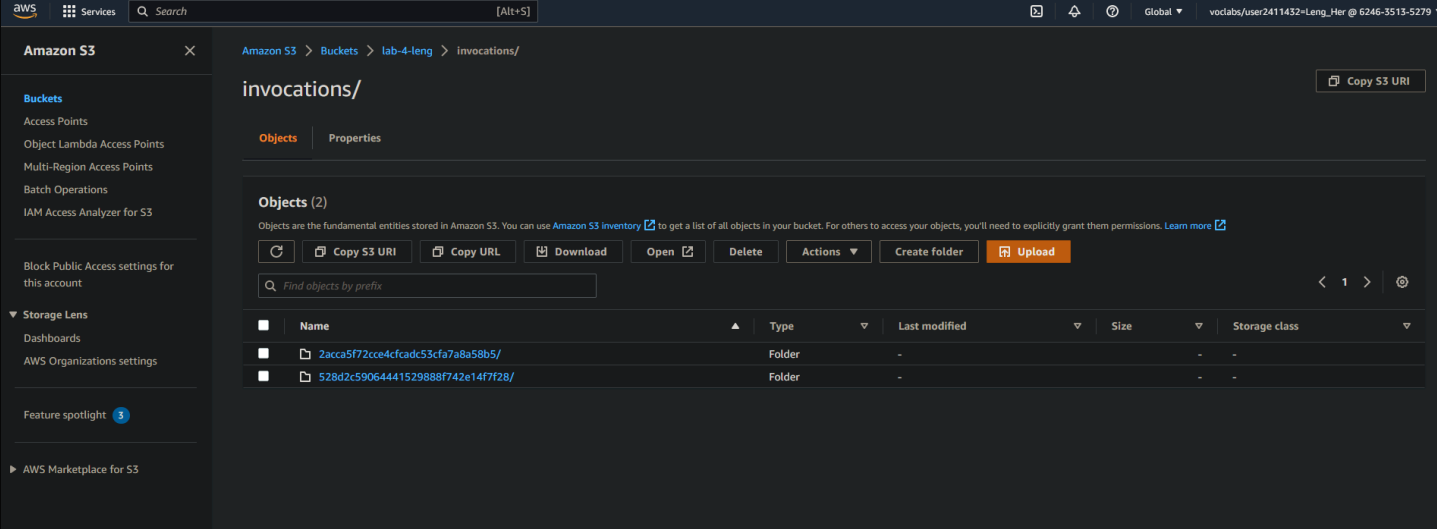